In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer



# from sklearn.metrics import f1_score, confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge ,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


from xgboost import XGBRegressor


from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [5]:
df=pd.read_csv("/content/Walmart_Store_sales.csv")

In [6]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

Number of rows : 150



In [7]:
print("Display of dataset: ")
display(df.head())
print()

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [8]:
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [9]:
#missing values checking nd count
df.isnull().any().value_counts()

True     7
False    1
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [11]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

# ***we working without column DATE for now then we will use it to get better prediction***

In [12]:
#drop flad date col
print("drop in progress...")
df0=df.drop(['Date'],axis=1)
df0.columns

drop in progress...


Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [13]:
print('Dropping outliers in weekly sales...')
to_keep = df0['Weekly_Sales'].isnull()!=True # We want keeping positives values or missings
df0 = df0.loc[to_keep,:] 
print('Done. Number of lines remaining : ', df0.shape[0])
print()


Dropping outliers in weekly sales...
Done. Number of lines remaining :  136



## ** vbs separation, divding, imputing,normlazing... all in 1 cell we have them well writen with plots when we add DAY MONTH YEAR cols**

In [18]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = 'Weekly_Sales'

X = df0.drop(target_variable, axis = 1)
Y = df0.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print("...Done.")
print()
# Create pipeline for numeric features
numeric_features = ["Fuel_Price","Unemployment","Temperature","CPI"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',missing_values=np.nan)), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0    6.0           NaN        59.61       3.045  214.777523         6.858
1   13.0           0.0        42.38       3.435  128.616064         7.470
3   11.0           0.0        84.57         NaN  214.556497         7.346
4    6.0           0.0        78.89       2.759  212.412888         7.092
5    4.0           0.0          NaN       2.756  126.160226         7.896
Dividing into train and test sets...
...Done.



In [19]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again 
print(X_test[0:5,:]) 
print()

Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
48     1.0           NaN        91.65       3.684  215.544618         7.962
85     2.0           0.0        44.69       2.976  211.064888         8.028
24    19.0           0.0        50.76       4.124  138.033200         8.150
125    3.0           0.0        63.91       3.308  221.643285         7.197
91    17.0           0.0        68.91       3.630         NaN         5.936
...Done.
  (0, 0)	0.873325821332278
  (0, 1)	0.30010836673036834
  (0, 2)	1.7897254402863787
  (0, 3)	0.9056666165005199
  (1, 0)	-0.6851596529571025
  (1, 1)	0.3474467109746308
  (1, 2)	-0.8595636262198436
  (1, 3)	0.7907781173095498
  (1, 4)	1.0
  (2, 0)	1.8418761160883894
  (2, 1)	0.43495092306251476
  (2, 2)	-0.5171193197102021
  (2, 3)	-1.0822145019981433
  (2, 21)	1.0
  (3, 0)	0.04565556944978207
  (3, 1)	-0.2485860779190617
  (3, 2)	0.22474931795071815
  (3, 3)	1.0620748681839958
  (3, 5)	1

In [20]:
# Train model
print("Train model...")
model0 = LinearRegression()
model0.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [21]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model0.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model0.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on training set...
...Done.
[1455655.02606006 1963332.29865616 1320442.92706105  415610.43256897
 1094834.92837433]

Predictions on test set...
...Done.
[1998993.02071295 1781857.88711224  511325.12806351 1997692.0748889
 1583159.88362573]



In [22]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.960258885825174
R2 score on test set :  0.954555915092416


# ***lets work on DATE column***

In [24]:
n,m=df.shape

In [25]:
year=[]
day=[]
month=[]
for i in range(n):
  if df['Date'].isnull()[i]==False:
    h=df['Date'][i]
    year.append(h.split("-")[0])
    month.append(h.split("-")[1])
    day.append(h.split("-")[2])
  else:
    year.append(np.nan)
    month.append(np.nan)
    day.append(np.nan)


In [26]:
df['year']=year
df['month']=month
df['day']=day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,02,2011
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,03,2011
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936,27,07,2012
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,05,2010


In [27]:
#checking cols before droping
print('nbr of missin values in col Date ',df['Date'].isnull().sum())

nbr of missin values in col Date  18


In [28]:
print('lets copy data to work on ')
df2=df.copy()

lets copy data to work on 


In [29]:
#drop date col
print("drop in progress...")
df2=df2.drop(['Date'],axis=1)

drop in progress...


In [30]:
print('Drop done')
display(df2.head())

Drop done


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,02,2011
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,03,2011
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,27,07,2012
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,05,2010


In [31]:
#nbr of missin line in weekly slas
df2["Weekly_Sales"].isnull().sum()

14

In [32]:
print('Dropping outliers in weekly sales...')
to_keep = df2['Weekly_Sales'].isnull()!=True # We want keeping positives values or missings
df2 = df2.loc[to_keep,:] 
print('Done. Number of lines remaining : ', df2.shape[0])
print()


Dropping outliers in weekly sales...
Done. Number of lines remaining :  136



In [33]:
df2["Weekly_Sales"].isnull().sum()

0

In [34]:
df2["Store"].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [35]:
fig = px.histogram(x = df2['Weekly_Sales'], nbins = 120, title = "Distribution of Weekly Sales")
fig.show()

<Axes: >

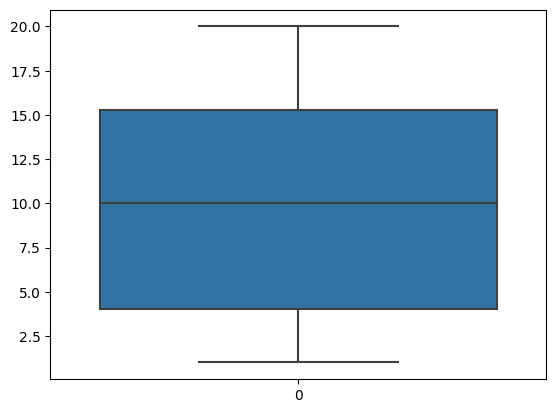

In [36]:
import seaborn as sns
sns.boxplot(df2['Store'])

In [37]:
# Correlation matrix
corr_matrix = df2.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

<ipython-input-37-e1f33ef2fff5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [38]:
df2.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'year', 'month', 'day'],
      dtype='object')

In [39]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = 'Weekly_Sales'

X = df2.drop(target_variable, axis = 1)
Y = df2.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

  year month   day  
0   18    02  2011  
1   25    03  2011  
3  NaN   NaN   NaN  
4   28    05  2010  
5   28    05  2010  


In [40]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print("...Done.")
print()     

Dividing into train and test sets...
...Done.



In [41]:
# Create pipeline for numeric features
numeric_features = ["Fuel_Price","Unemployment","Temperature","CPI"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',missing_values=np.nan)), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [42]:
# analysis
# Distribution of each numeric variable

for i in range(len(numeric_features)):
    fig = px.histogram(df2[numeric_features[i]])
    fig.show()

In [43]:
df2['Store'].shape[0]

136

In [44]:
df2['Store'].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [45]:
df2['Holiday_Flag'].unique()

array([nan,  0.,  1.])

In [46]:
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical features as an integer array.

# The input to this transformer should be an array-like of integers or strings,
#  denoting the values taken on by categorical (discrete) features. The features are converted
#   to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag','year', 'month', 'day'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ]) 
   

In [47]:
# analysis
# Barplot of each qualitative variable
for i in range(len(categorical_features)):
    fig = px.bar(df2[categorical_features[i]])
    fig.show()

In [48]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [49]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
48     1.0           NaN        91.65       3.684  215.544618         7.962   
85     2.0           0.0        44.69       2.976  211.064888         8.028   
24    19.0           0.0        50.76       4.124  138.033200         8.150   
125    3.0           0.0        63.91       3.308  221.643285         7.197   
91    17.0           0.0        68.91       3.630         NaN         5.936   

    year month   day  
48    05    08  2011  
85    07    01  2011  
24    04    05  2012  
125   18    11  2011  
91   NaN   NaN   NaN  
...Done.
  (0, 0)	0.873325821332278
  (0, 1)	0.30010836673036834
  (0, 2)	1.7897254402863787
  (0, 3)	0.9056666165005199
  (0, 27)	1.0
  (0, 59)	1.0
  (0, 64)	1.0
  (1, 0)	-0.6851596529571025
  (1, 1)	0.3474467109746308
  (1, 2)	-0.8595636262198436
  (1, 3)	0.7907781173095498
  (1, 4)	1.0
  (1, 29)	1.0
  (1, 64)	1.0
  (2, 0)	1.8418761160883894

In [50]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on test set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
94    14.0           0.0        78.47       3.760  186.139981         8.625   
137   10.0           0.0        88.44       3.112  126.128355         9.199   
41    16.0           0.0          NaN       3.659  198.126718         6.061   
88    20.0           0.0        39.79       3.739  213.472512         6.961   
58     6.0           0.0          NaN       2.640  212.894485         6.973   

    year month   day  
94    15    07  2011  
137  NaN   NaN   NaN  
41    14    09  2012  
88   NaN   NaN   NaN  
58    30    07  2010  
...Done.
  (0, 0)	1.0406208722446966
  (0, 1)	0.7756435520932058
  (0, 2)	1.0461643266460035
  (0, 3)	0.15154645466599598
  (0, 16)	1.0
  (0, 37)	1.0
  (0, 58)	1.0
  (0, 64)	1.0
  (1, 0)	-0.3857895618506684
  (1, 1)	1.1873436974902936
  (1, 2)	1.6086305104847392
  (1, 3)	-1.387529739447798
  (1, 12)	1.0
  (1, 34)	1.0
  (1, 56)	1.0
  (2, 0)	0.81

In [51]:
X_train.shape

(108, 66)

In [52]:
# Train model
print("Train model...")
model1 = LinearRegression()
model1.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [53]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model1.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[1624385.19955438 1694138.73068311 1368202.60988513  427800.24918976
 1023093.73577486]



In [54]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model1.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[1935209.00019403 1793661.94595006  372330.01810143 1968284.40804473
 1482044.65616835]



In [55]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9951746984003025
R2 score on test set :  0.936257323489887


In [56]:
print("Constant is: ", model1.intercept_)
print("coefficients are: ", model1.coef_) 

print()

Constant is:  1240965.1096938564
coefficients are:  [  -43054.42150152   -81699.53784914    11974.19691442    49427.43242401
   339986.81085955 -1169341.29283684   450579.39554771 -1274659.89973828
   -77331.81101216  -883643.80939876  -679943.55945569 -1193585.12350137
   402604.49750325    18004.69404741  -104629.20252506   512111.5434965
   614908.2851915   -835395.34583942 -1095119.65213249  -587248.71940488
  -246999.04769673    46172.52083774   427650.49513297    38366.41138906
   259179.09523941   177449.35922477   -26855.9033854    203313.77450886
   124512.77393588    70102.37883245   285736.17180819   278504.84615387
   -75425.40014512   -20142.2254833     52679.1323901    101365.29715541
   -47613.90118387   124178.48370617   111763.19936109  -101270.24964309
    55907.56374439    76891.33366958    36608.49966296   -91991.08972588
    42667.27423869   -19988.8634844      5413.89137849   104073.17253068
   -30048.04958663    48493.71358202   178155.00602594   151563.24411819


In [57]:
model1.coef_

array([  -43054.42150152,   -81699.53784914,    11974.19691442,
          49427.43242401,   339986.81085955, -1169341.29283684,
         450579.39554771, -1274659.89973828,   -77331.81101216,
        -883643.80939876,  -679943.55945569, -1193585.12350137,
         402604.49750325,    18004.69404741,  -104629.20252506,
         512111.5434965 ,   614908.2851915 ,  -835395.34583942,
       -1095119.65213249,  -587248.71940488,  -246999.04769673,
          46172.52083774,   427650.49513297,    38366.41138906,
         259179.09523941,   177449.35922477,   -26855.9033854 ,
         203313.77450886,   124512.77393588,    70102.37883245,
         285736.17180819,   278504.84615387,   -75425.40014512,
         -20142.2254833 ,    52679.1323901 ,   101365.29715541,
         -47613.90118387,   124178.48370617,   111763.19936109,
        -101270.24964309,    55907.56374439,    76891.33366958,
          36608.49966296,   -91991.08972588,    42667.27423869,
         -19988.8634844 ,     5413.89137

# Each coefficient can be linked with the name of the corresponding feature 



In [58]:
df2['Store'].unique()

array([ 6., 13., 11.,  4., 15., 20., 14.,  3.,  8., 18.,  7.,  1., 17.,
        2.,  5., 19., 16., 12.,  9., 10.])

In [59]:
len(preprocessor.transformers_)

2

In [60]:
preprocessor.transformers_[1][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))])

In [61]:
preprocessor.transformers_[0][2]

['Fuel_Price', 'Unemployment', 'Temperature', 'CPI']

In [62]:
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name != 'num': # if pipeline is for numeric variables
      print(features_list)
      

['Store', 'Holiday_Flag', 'year', 'month', 'day']


In [63]:
len(pipeline.named_steps['encoder'].get_feature_names_out())

62

***get names  after one hotencoder***

In [64]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
     
        features = pipeline.named_steps['encoder'].get_feature_names_out(features_list) # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Fuel_Price', 'Unemployment', 'Temperature', 'CPI', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0', 'year_02', 'year_03', 'year_04', 'year_05', 'year_06', 'year_07', 'year_08', 'year_09', 'year_10', 'year_11', 'year_12', 'year_13', 'year_14', 'year_15', 'year_16', 'year_17', 'year_18', 'year_19', 'year_20', 'year_22', 'year_23', 'year_24', 'year_25', 'year_26', 'year_27', 'year_28', 'year_29', 'year_30', 'year_31', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'day_2011', 'day_2012']


In [65]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = model1.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Fuel_Price,-43054.421502
Unemployment,-81699.537849
Temperature,11974.196914
CPI,49427.432424
Store_2.0,339986.810860
...,...
month_10,141686.393310
month_11,213560.381990
month_12,775659.998327
day_2011,13177.966682


In [66]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
year_25,5.413891e+03
Temperature,1.197420e+04
day_2011,1.317797e+04
Store_11.0,1.800469e+04
year_24,1.998886e+04
...,...
Store_7.0,8.836438e+05
Store_16.0,1.095120e+06
Store_3.0,1.169341e+06
Store_9.0,1.193585e+06


In [67]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# MAE MSE... **METRICS** 

In [68]:
mae = metrics.mean_absolute_error(Y_test, Y_test_pred)
mse = metrics.mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(Y_test, Y_test_pred)

names=['MAE','MSE','RMSE','R²']
l=[mae,mse,rmse,r2]
tl=np.array(l).T.tolist()
tl

[106877.394165669, 24005856133.046444, 154938.2332836103, 0.936257323489887]

In [69]:
s = pd.DataFrame(data = tl,index=names,columns = ['valeurs on test '])
s


,valeurs on test
MAE,1.068774e+05
MSE,2.400586e+10
RMSE,1.549382e+05
R²,9.362573e-01


In [70]:
# a=model1.coef_
# print(a.flatten())
# As we didn't implement a complex preprocessing pipeline, the column names is just the initial list of features !
# column_names = [c for c in df2.columns if c != 'Weekly_Sales' ]


# **RIDGE**

In [71]:
a=1
b=100

In [72]:
ridge1 = Ridge(alpha=a) # Ridge(alpha=100000) ect by default equal 1
print(ridge1)
ridge1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", ridge1.score(X_train, Y_train))
print("R2 score on test set : ", ridge1.score(X_test, Y_test))

Ridge(alpha=1)
R2 score on training set :  0.9584166476197231
R2 score on test set :  0.8703210370541191


In [73]:
ridge2 = Ridge(alpha=b) 
print(ridge2)
ridge2.fit(X_train, Y_train)

print("R2 score on training set : ", ridge2.score(X_train, Y_train))
print("R2 score on test set : ", ridge2.score(X_test, Y_test))

Ridge(alpha=100)
R2 score on training set :  0.21625056848468005
R2 score on test set :  0.07898808943826796


In [74]:
if ridge2.score(X_train, Y_train) > ridge1.score(X_train, Y_train):
  paramlist=np.arange(b,1000,10)
else:
    paramlist=np.arange(0,a,0.01)
paramlist

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [75]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': paramlist # 0 corresponds to no regularization
}
best_ridge = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.07}
Best R2 score :  0.9180810947949432


# ***Ridge Final after Grid search***

In [76]:
ridgefinal = Ridge(alpha=best_ridge.best_params_['alpha']) 
print(ridgefinal)
ridgefinal.fit(X_train, Y_train)

print("R2 score on training set : ", ridgefinal.score(X_train, Y_train))
print("R2 score on test set : ", ridgefinal.score(X_test, Y_test))

Ridge(alpha=0.07)
R2 score on training set :  0.9939403739738938
R2 score on test set :  0.9466424511974314


# ***Laso time***

In [77]:
lasso1 = Lasso(alpha = a)
print(lasso1)
lasso1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso1.score(X_train, Y_train))
print("R2 score on test set : ", lasso1.score(X_test, Y_test))

Lasso(alpha=1)
R2 score on training set :  0.9951745952241933
R2 score on test set :  0.9365938937197639


In [78]:
lasso100 = Lasso(alpha = b)
print(lasso100)
lasso100.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso100.score(X_train, Y_train))
print("R2 score on test set : ", lasso100.score(X_test, Y_test))

Lasso(alpha=100)
R2 score on training set :  0.9947752599901615
R2 score on test set :  0.9553822917481903


In [79]:
if lasso100.score(X_train, Y_train) > lasso1.score(X_train, Y_train):
  paramlist=np.arange(b,1000,10)
else:
    paramlist=np.arange(0,a,0.01)
print('params list', paramlist)
# Perform grid search
print("Grid search...")
regressor = Lasso()
# Grid of values to be tested
params = {
    'alpha': paramlist # 0 corresponds to no regularization
}
best_lasso = GridSearchCV(regressor, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

params list [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Grid search...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 92887775029.5883, tolerance: 4251399983.9302855

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 70764960838.15454, tolerance: 4033126681.519498

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686

...Done.
Best hyperparameters :  {'alpha': 0.99}
Best R2 score :  0.931117588048679


# ***Lasso final after grid search for best parmas***

In [80]:
lassofinal = Lasso(alpha=best_lasso.best_params_['alpha']) 
print(lassofinal)
lassofinal.fit(X_train, Y_train)

print("R2 score on training set : ", lassofinal.score(X_train, Y_train))
print("R2 score on test set : ", lassofinal.score(X_test, Y_test))

Lasso(alpha=0.99)
R2 score on training set :  0.9951745973381825
R2 score on test set :  0.9365904505629218


# ***+-fitting ?***

***Ridge final fit ?***

In [81]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.8136123938970122
The standard deviation is :  0.08102696094380722


# ***Ridge fitting well***

In [82]:
x=ridgefinal.score(X_test, Y_test)
print('test',x)
y=ridgefinal.score(X_train, Y_train)
print('train',y)
z=scores.std()
print(z)
if x-y < z :
  print('good fit')
else :
  print('over fit')  


test 0.9466424511974314
train 0.9939403739738938
0.08102696094380722
good fit


# *** Lasso fit  ? *** 

In [83]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("10-fold cross-validation...")
regressor2 = Lasso()
scoreslasso = cross_val_score(regressor2, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scoreslasso.mean())
print('The standard deviation is : ', scoreslasso.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.9311213380447368
The standard deviation is :  0.04780148341302097


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 35759878199.32163, tolerance: 4033126681.519498



# ***Also lasso is good fit***

In [84]:
x=lassofinal.score(X_test, Y_test)
print('test',x)
y=lassofinal.score(X_train, Y_train)
print('train',y)
z=scoreslasso.std()
print(z)
if x-y < z :
  print('good fit')
else :
  print('over fit')  


test 0.9365904505629218
train 0.9951745973381825
0.04780148341302097
good fit


# ***Who s Better ?***

In [85]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", ridgefinal.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", ridgefinal.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", lassofinal.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", lassofinal.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9939403739738938
RIDGE / R2 score on test set :  0.9466424511974314

LASSO / R2 score on training set :  0.9951745973381825
LASSO / R2 score on test set :  0.9365904505629218


In [86]:
comparaison={'Ridge train':best_ridge.score(X_train, Y_train),
             "Lasso train":best_lasso.score(X_train, Y_train),
             "Ridge test":best_ridge.score(X_test, Y_test),
             "Lasso test":best_lasso.score(X_test, Y_test)}
comparaison


{'Ridge train': 0.9939403739738938,
 'Lasso train': 0.9951745973381825,
 'Ridge test': 0.9466424511974314,
 'Lasso test': 0.9365904505629218}

In [87]:
comp = pd.DataFrame(data =comparaison,index=['R²'])
comp


,Ridge train,Lasso train,Ridge test,Lasso test
R²,0.99394,0.995175,0.946642,0.93659


# ***Decsion tree !! regressor***

***syntax***  
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [88]:
print("Decision Tree Regressor with default hyperparameters...")
dectree=DecisionTreeRegressor()
dectree.fit(X_train, Y_train)
print("...Done.")

Decision Tree Regressor with default hyperparameters...
...Done.


In [95]:
print("R2 score on training set :",dectree.score(X_train,Y_train) )
print("R2 score on test set :",dectree.score(X_test,Y_test) )

R2 score on training set : 1.0
R2 score on test set : 0.9587521631483257


# ***Woooow ***

In [101]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a decision tree model
print("5-fold cross-validation...")
regressor3 = DecisionTreeRegressor()
scores3 = cross_val_score(regressor3, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores3.mean())
print('The standard deviation is : ', scores3.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.3051316226219956
The standard deviation is :  0.45020435510419854


# ***some grid search to get better params for decision tree***


In [96]:
# Perform grid search
print("Grid search...")
dectreegrid = DecisionTreeRegressor()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
dectree1 = GridSearchCV(dectreegrid, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
dectree1.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", dectree1.best_params_)
print("Best validation accuracy : ", dectree1.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best validation accuracy :  0.44116130078252647


# ***Final decision tree after grid***

In [100]:
decisontreefinal=DecisionTreeRegressor(max_depth=dectree1.best_params_['max_depth'],
                                          min_samples_split=dectree1.best_params_['min_samples_split'],
                                          min_samples_leaf=dectree1.best_params_['min_samples_leaf'],)

dectfinal=dectreegrid.fit(X_train, Y_train)  
print("Random forest (regressor)/ R2 score on training set : ", dectfinal.score(X_train, Y_train))
print("Random forest (regressor)/ R2 score on test set : ", dectfinal.score(X_test, Y_test))

Random forest (regressor)/ R2 score on training set :  1.0
Random forest (regressor)/ R2 score on test set :  0.9604482377027513


# ***ADA Boost regressor applied on final decision tree***

In [111]:
regr_2 = AdaBoostRegressor(dectfinal)
regr_2.fit(X_train, Y_train)

print("ADA BOOST/ R2 score on training set : ", regr_2.score(X_train, Y_train))
print("ADA BOOSt/ R2 score on test set : ", regr_2.score(X_test, Y_test))


ADA BOOST/ R2 score on training set :  0.9985460047990318
ADA BOOSt/ R2 score on test set :  0.9375136874241154


# ***XGB BOOST***

In [112]:
# Create the model XGBRegressor
xgbboost = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
xgbboost.fit(X_train,Y_train)

print("xgb boost/ R2 score on training set : ", xgbboost.score(X_train, Y_train))
print("xgb BOOSt/ R2 score on test set : ", xgbboost.score(X_test, Y_test))

xgb boost/ R2 score on training set :  0.999999843296017
xgb BOOSt/ R2 score on test set :  0.9315033524323816


# ***Random forest ? ***

In [114]:
print("Random Forest with default hyperparameters...")
regressor = RandomForestRegressor() # we must use a regressor here!
regressor.fit(X_train, Y_train)
print("...Done.")

Random Forest with default hyperparameters...
...Done.


In [115]:
print("R2 score on training set : ",regressor.score(X_train,Y_train))
print("R2 score on training set : ",regressor.score(X_test,Y_test))

R2 score on training set :  0.9570951412596531
R2 score on training set :  0.8423459747696395


In [116]:
# Perform grid search
print("Grid search...")
regressor = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [10, 12, 14],
    'min_samples_split': [4, 8],
    'n_estimators': [60, 80, 100]
}
gridrforest = GridSearchCV(regressor, param_grid = params, cv = 10, verbose = 2)
gridrforest.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridrforest.best_params_)
print("Best validation accuracy : ", gridrforest.best_score_)

Grid search...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END .max_depth=10, min_sam

# ***progress in test score comparing to by defaults params***

In [117]:
# Print R^2 scores
print("R2 score on training set : ", gridrforest.score(X_train, Y_train))
print("R2 score on test set : ", gridrforest.score(X_test, Y_test))

R2 score on training set :  0.9445019167033812
R2 score on test set :  0.8210204299127973


# ***syntax***

In [118]:
# class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                                              min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#                                              oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [119]:
gridrforest.best_params_

{'max_depth': 14, 'min_samples_split': 4, 'n_estimators': 60}

In [120]:
randomforestfinal=RandomForestRegressor(max_depth=gridrforest.best_params_['max_depth'],
                                          min_samples_split=gridrforest.best_params_['min_samples_split'],
                                          n_estimators=gridrforest.best_params_['n_estimators'],)
print(randomforestfinal)
rr=randomforestfinal.fit(X_train, Y_train)  

RandomForestRegressor(max_depth=14, min_samples_split=4, n_estimators=60)


In [121]:
print("Random forest (regressor)/ R2 score on training set : ", rr.score(X_train, Y_train))
print("Random forest (regressor)/ R2 score on test set : ", rr.score(X_test, Y_test))

Random forest (regressor)/ R2 score on training set :  0.9526899860788972
Random forest (regressor)/ R2 score on test set :  0.8425177048679418


In [122]:
comp['Rd Forest train'] = [ rr.score(X_train, Y_train)  ]
comp["Random forest test"] = [ rr.score(X_test, Y_test) ]
comp['decison tree train'] = [dectfinal.score(X_train, Y_train) ]
comp['decison tree test'] = [dectfinal.score(X_test, Y_test)]
comp['ADA BOOSt on dec tree train']=[regr_2.score(X_train, Y_train)]
comp['ADA BOOSt on dec tree test']=[regr_2.score(X_test, Y_test)]
comp['XGB BOOST train']=[xgbboost.score(X_train, Y_train)]
comp['XGB BOOST test']=[xgbboost.score(X_test, Y_test)]

comp

,Ridge train,Lasso train,Ridge test,Lasso test,Rd Forest train,Random forest test,decison tree train,decison tree test,ADA BOOSt on dec tree train,ADA BOOSt on dec tree test,XGB BOOST train,XGB BOOST test
R²,0.99394,0.995175,0.946642,0.93659,0.95269,0.842518,1.0,0.960448,0.998546,0.937514,1.0,0.931503


In [128]:
comp.loc["R²",:]

Ridge train                    0.993940
Lasso train                    0.995175
Ridge test                     0.946642
Lasso test                     0.936590
Rd Forest train                0.952690
Random forest test             0.842518
decison tree train             1.000000
decison tree test              0.960448
ADA BOOSt on dec tree train    0.998546
ADA BOOSt on dec tree test     0.937514
XGB BOOST train                1.000000
XGB BOOST test                 0.931503
Name: R², dtype: float64